<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [0]:
df=pd.read_csv('/content/musk_csv.csv')

In [139]:
df.shape

(6598, 170)

In [140]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [141]:
df.groupby('class').agg('count')


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,...,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581
1,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017


In [142]:
df.isna().count()

ID                   6598
molecule_name        6598
conformation_name    6598
f1                   6598
f2                   6598
                     ... 
f163                 6598
f164                 6598
f165                 6598
f166                 6598
class                6598
Length: 170, dtype: int64

In [0]:
df=df.drop(['ID',	'molecule_name',	'conformation_name'	],axis=1)

In [145]:
df.shape

(6598, 167)

In [146]:
df.head

<bound method NDFrame.head of       f1   f2   f3   f4   f5   f6  ...  f162  f163  f164  f165  f166  class
0     46 -108  -60  -69 -117   49  ...   126   156   -50  -112    96      1
1     41 -188 -145   22 -117   -6  ...   136   169   -61  -136    79      1
2     46 -194 -145   28 -117   73  ...   142   165   -67  -145    39      1
3     41 -188 -145   22 -117   -7  ...   136   168   -60  -135    80      1
4     41 -188 -145   22 -117   -7  ...   137   168   -60  -135    80      1
...   ..  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
6593  51 -123  -23 -108 -117  134  ...   107   171   -44  -115   118      0
6594  44 -104  -19 -105 -117  142  ...   129   158   -66  -144    -5      0
6595  44 -102  -19 -104 -117   72  ...   130   159   -66  -144    -6      0
6596  51 -121  -23 -106 -117   63  ...   106   171   -44  -116   117      0
6597  51 -122  -23 -106 -117  190  ...   107   171   -44  -115   118      0

[6598 rows x 167 columns]>

In [0]:

train,test=train_test_split(df,test_size=0.2)

In [148]:
train.shape

(5278, 167)

In [0]:
train_label=train['class']
test_label=test['class']

In [0]:
train=train.drop(['class'],axis=1)
test=test.drop(['class'],axis=1)

In [152]:
train.shape

(5278, 166)

In [0]:

train = pd.DataFrame(preprocessing.normalize(train, norm='l2'))
test=pd.DataFrame(preprocessing.normalize(test,norm='l2'))


In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
0,0.037052,-0.107906,-0.042252,-0.029252,-0.072154,0.081905,-0.105956,0.073454,-0.149509,-0.033152,-0.084505,-0.054603,-0.033152,-0.050053,-0.072154,-0.194361,-0.143008,-0.022751,-0.017551,0.005200,-0.088405,-0.119607,-0.117007,0.048103,0.062404,-0.107256,-0.119607,-0.099456,-0.014301,0.080605,-0.063704,0.089705,-0.079305,0.011051,-0.079955,0.051353,0.000000,-0.079955,0.046153,-0.059153,...,-0.011701,0.063054,-0.043553,-0.074104,0.024701,0.009751,-0.056553,-0.041602,-0.023401,-0.009751,-0.115707,0.063054,-0.103356,-0.050053,-0.080605,-0.057853,-0.097506,-0.109206,-0.115057,-0.064354,-0.052003,-0.038352,-0.081905,-0.087755,-0.067604,-0.076704,-0.073454,-0.026652,0.076054,-0.009751,0.053953,-0.045503,0.113757,0.010401,0.019501,0.062404,0.117007,-0.026001,-0.076054,0.085155
1,0.153033,-0.105210,-0.059513,-0.040384,-0.062170,0.006376,0.013815,-0.051011,-0.011159,-0.012753,-0.128059,-0.114243,-0.036133,-0.151970,-0.150376,-0.158347,-0.028162,-0.040384,-0.100428,-0.095646,-0.034007,-0.007439,-0.021786,0.051011,0.059513,0.011690,-0.010627,-0.072266,0.013284,0.036664,-0.061638,-0.010096,-0.046229,0.008502,-0.018598,0.160472,-0.092989,0.038790,-0.077048,0.037196,...,0.021786,0.030819,0.008502,-0.079705,0.148782,0.039852,-0.034539,-0.088738,-0.111055,-0.011159,0.024443,-0.061638,-0.001063,-0.017004,-0.048886,0.040384,0.041978,0.032413,-0.094583,-0.054731,-0.064826,-0.018598,-0.056856,0.021255,-0.029225,-0.055262,-0.060044,-0.089269,-0.005845,-0.100428,-0.125402,-0.038790,-0.068546,-0.068015,-0.063232,0.168443,0.115306,0.002657,0.072266,0.089801
2,0.028822,-0.024704,-0.032115,0.107875,-0.096346,0.071642,0.075760,0.029645,-0.021410,-0.055173,-0.033762,-0.031292,-0.015646,-0.080700,-0.046115,-0.234690,0.042821,-0.051879,0.007411,-0.023057,-0.027175,-0.004941,-0.012352,-0.062584,-0.078230,-0.032115,0.127639,-0.092229,0.065878,-0.104581,-0.083171,0.109522,-0.017293,-0.135873,0.011529,0.079877,0.109522,0.023057,-0.118580,0.098817,...,-0.066701,-0.114463,-0.051879,0.068348,0.020587,0.034586,-0.060937,-0.025528,-0.051055,-0.046115,0.051879,-0.057643,-0.037880,-0.025528,-0.055173,0.046115,0.039527,0.020587,-0.146578,-0.085641,-0.103758,0.088112,0.088112,0.123521,-0.018940,0.055173,0.005764,-0.044468,0.101287,0.018940,-0.183635,-0.177047,-0.116110,-0.071642,-0.085641,0.074936,0.180341,-0.040350,-0.135050,0.112816
3,0.000672,-0.073197,-0.013431,0.015445,-0.078569,0.006715,-0.110803,0.041635,-0.142365,-0.016788,-0.072526,-0.054394,-0.040964,-0.061110,-0.036934,-0.192730,-0.142365,-0.007387,-0.024175,-0.026190,-0.063124,-0.122219,-0.126248,0.144380,0.059767,-0.137664,-0.115504,-0.107445,0.000672,0.083270,-0.078569,-0.001343,-0.028876,0.010745,-0.012759,0.067153,-0.113489,-0.102745,-0.014102,-0.088642,...,-0.016117,0.064467,-0.042978,-0.024847,0.012088,-0.012088,-0.036263,-0.036263,-0.022832,-0.018803,-0.115504,-0.030219,-0.133635,-0.051037,-0.073869,-0.094686,-0.102073,-0.110803,-0.119533,-0.069840,-0.082599,-0.025518,-0.039621,-0.096029,-0.010745,0.003358,0.008730,-0.036263,-0.007387,-0.055066,-0.161840,-0.194073,0.002015,-0.018803,-0.040292,-0.005372,0.158482,-0.030891,-0.119533,0.099387
4,0.028681,0.055406,0.009778,-0.047584,-0.076265,0.046280,-0.108205,0.026725,-0.125805,-0.013689,-0.058665,-0.060621,-0.048888,-0.029985,-0.048888,-0.175996,-0.116679,0.028029,-0.009778,0.003259,-0.061273,-0.119938,-0.096472,0.131019,0.123197,-0.122545,-0.103642,-0.102339,0.003911,0.170130,-0.076265,-0.022814,-0.015644,-0.020207,-0.101687,0.098427,-0.107553,-0.076265,-0.014992,-0.071050,...,0.003911,0.137538,-0.021511,-0.122545,-0.056710,-0.067791,-0.017600,-0.048888,-0.018251,-0.024770,-0.097776,-0.080828,-0.106250,-0.025422,-0.041718,-0.061925,-0.099079,-0.109509,-0.116027,-0.067139,-0.079524

In [154]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',verbose=True,random_state=1)
svclassifier.fit(train,train_label)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=True)

In [0]:
y_pred=svclassifier.predict(test)


In [156]:
from sklearn.metrics import accuracy_score
print (accuracy_score(test_label, y_pred))

0.9363636363636364


In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label,y_pred))
print(classification_report(test_label,y_pred))


[[1111    4]
 [  80  125]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1115
           1       0.97      0.61      0.75       205

    accuracy                           0.94      1320
   macro avg       0.95      0.80      0.86      1320
weighted avg       0.94      0.94      0.93      1320



In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation


In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)

Deep learning solution

In [0]:
import matplotlib.pyplot as plt 

In [161]:
from sklearn.neural_network import MLPClassifier
num_epoch=10
train_score=[]
 
mlp = MLPClassifier(hidden_layer_sizes=(10,10),solver='sgd',
                      learning_rate_init=0.01,max_iter=500)

mlp.fit(train,train_label)
 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.01, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [162]:
print(mlp.score(test,test_label))

0.9931818181818182


In [0]:
model=Sequential()
model.add(Dense(20,input_dim=(166),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                3340      
_________________________________________________________________
dense_35 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 4,091
Trainable params: 4,091
Non-trainable params: 0
_________________________________________________________________


In [165]:
history=model.fit(train,train_label,epochs=25,batch_size=100,validation_split=0.2)

Train on 4222 samples, validate on 1056 samples
Epoch 1/25
4222/4222 [==============================] - 1s 222us/step - loss: 0.4742 - acc: 0.8494 - val_loss: 0.4264 - val_acc: 0.8333
Epoch 2/25
4222/4222 [==============================] - 0s 23us/step - loss: 0.3860 - acc: 0.8494 - val_loss: 0.3867 - val_acc: 0.8333
Epoch 3/25
4222/4222 [==============================] - 0s 22us/step - loss: 0.3456 - acc: 0.8494 - val_loss: 0.3451 - val_acc: 0.8333
Epoch 4/25
4222/4222 [==============================] - 0s 25us/step - loss: 0.2996 - acc: 0.8508 - val_loss: 0.3019 - val_acc: 0.8475
Epoch 5/25
4222/4222 [==============================] - 0s 23us/step - loss: 0.2606 - acc: 0.8899 - val_loss: 0.2647 - val_acc: 0.8968
Epoch 6/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.2326 - acc: 0.9150 - val_loss: 0.2427 - val_acc: 0.9157
Epoch 7/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.2111 - acc: 0.9240 - val_loss: 0.2494 - val_acc: 0.9062
Epoch 

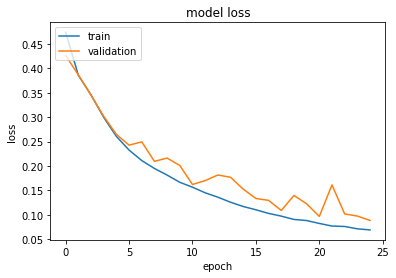

In [166]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_pred=model.predict_classes(test)
y_pred=y_pred[:,0]


calculating accuracy_score

In [174]:
accuracy = accuracy_score(test_label, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.976515


calculating precision

In [176]:
precision = precision_score(test_label, y_pred)
print('Precision: %f' % precision)

Precision: 0.926471


calculating Recall

In [177]:
recall = recall_score(test_label, y_pred)
print('Recall: %f' % recall)

Recall: 0.921951


calculating f1 score

In [178]:
f1 = f1_score(test_label, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.924205


confusion matrix

In [179]:
matrix = confusion_matrix(test_label, y_pred)
print(matrix)

[[1100   15]
 [  16  189]]


saving the model in h5

In [0]:
model.save("model.h5")

In [183]:
from keras.models import load_model
model1 = load_model('model.h5')
model1.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                3340      
_________________________________________________________________
dense_35 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 4,091
Trainable params: 4,091
Non-trainable params: 0
_________________________________________________________________


In [184]:
score = model1.evaluate(test,test_label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 97.65%
